# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [56]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [24]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 634


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [32]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f'q={city}&APPID={weather_api_key}&units=standard'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = time.strftime('%Y-%m-%d', time.gmtime(city_weather['dt']))

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san ignacio
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | khasab
Processing Record 5 of Set 1 | huaral
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | vallenar
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | college
Processing Record 11 of Set 1 | thames
Processing Record 12 of Set 1 | quiberon
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | arraial do cabo
Processing Record 15 of Set 1 | qaqortoq
Processing Record 16 of Set 1 | paide
Processing Record 17 of Set 1 | happy valley-goose bay
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | san juan
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | lompoc
Processing Record 22 of Set 1 | tomat

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

In [34]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san ignacio,17.1561,-89.0714,307.23,52,20,2.06,BZ,2024-09-01
1,avarua,-21.2078,-159.7750,294.18,94,75,7.72,CK,2024-09-01
2,edinburgh of the seven seas,-37.0676,-12.3116,283.03,67,100,10.06,SH,2024-09-01
3,khasab,26.1799,56.2477,304.03,59,75,2.31,OM,2024-09-01
4,huaral,-11.4950,-77.2078,293.10,65,49,3.44,PE,2024-09-01


In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [57]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san ignacio,17.1561,-89.0714,307.23,52,20,2.06,BZ,2024-09-01
1,avarua,-21.2078,-159.7750,294.18,94,75,7.72,CK,2024-09-01
2,edinburgh of the seven seas,-37.0676,-12.3116,283.03,67,100,10.06,SH,2024-09-01
3,khasab,26.1799,56.2477,304.03,59,75,2.31,OM,2024-09-01
4,huaral,-11.4950,-77.2078,293.10,65,49,3.44,PE,2024-09-01


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

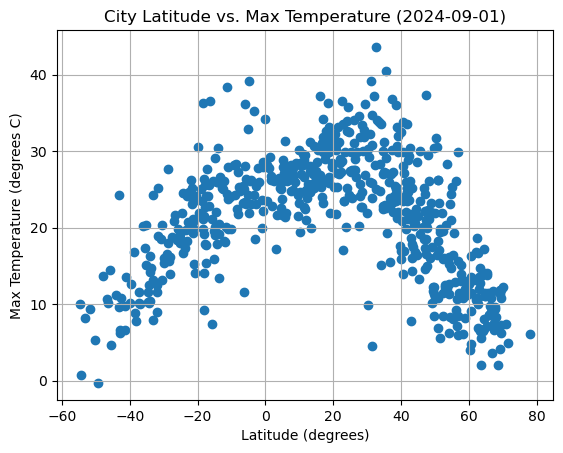

In [12]:
ctemps = [(T - 273) for T in city_data_df['Max Temp']] # convert to celcius rather than run the whole data gathering process again

# Build scatter plot for latitude vs. temperature
plt.scatter(x=city_data_df['Lat'],y=ctemps)

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (2024-09-01)')
plt.ylabel('Max Temperature (degrees C)')
plt.xlabel('Latitude (degrees)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

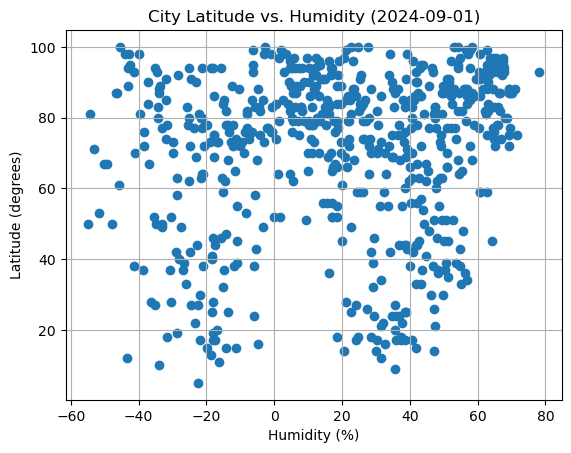

In [5]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    x=city_data_df['Lat'],
    y=city_data_df['Humidity']
)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2024-09-01)')
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude (degrees)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

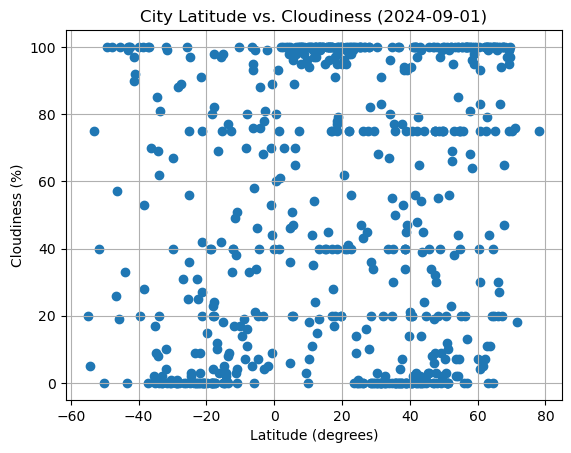

In [8]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    x=city_data_df['Lat'],
    y=city_data_df['Cloudiness']
)
# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness (2024-09-01)')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

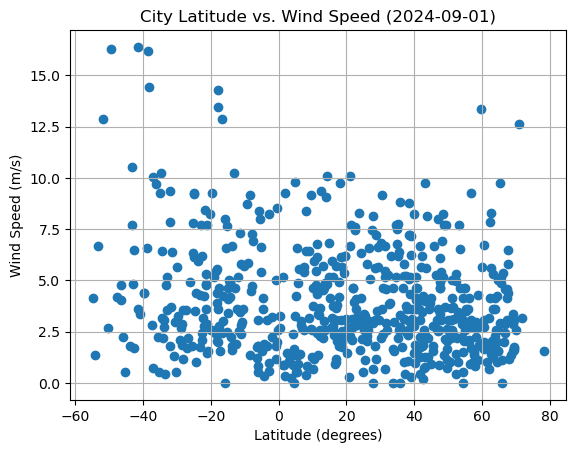

In [10]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    x=city_data_df['Lat'],
    y=city_data_df['Wind Speed']
)
# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed (2024-09-01)')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [81]:
# Define a function to create Linear Regression plots
def LinRegPlot(xdata, ydata, noteheight):
    values = linregress(x=xdata, y=ydata)
    slope = values[0]
    intercept = values[1]
    r2 = values[2] ** 2

    xrange = [xdata.min(),xdata.max()]

    plt.plot(xrange,
             [slope*x_ + intercept for x_ in xrange],
             color='red')
    plt.annotate(f'y = {round(slope,2)}x + {round(intercept,2)}\nr^2 = {round(r2,3)}',
                xy=(xdata.min(),noteheight),
                color='red',
                backgroundcolor='white')
    # plt.annotate(f'r^2 = {round(r2,3)}',
    #             xy=(xdata.min(),(noteheight / 2)),
    #             color='red',
    #             backgroundcolor='white')

In [22]:
linregress(city_data_df['Lat'], city_data_df['Max Temp'])

LinregressResult(slope=-0.02929579494582943, intercept=294.8924027546074, rvalue=-0.11672773226562276, pvalue=0.003831979919821061, stderr=0.010092233022088075, intercept_stderr=0.3771808244128016)

In [45]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san ignacio,17.1561,-89.0714,307.23,52,20,2.06,BZ,2024-09-01
3,khasab,26.1799,56.2477,304.03,59,75,2.31,OM,2024-09-01
9,college,64.8569,-147.8028,284.12,74,100,1.54,US,2024-09-01
11,quiberon,47.4841,-3.1196,291.54,83,9,6.11,FR,2024-09-01
14,qaqortoq,60.7167,-46.0333,277.84,59,4,1.64,GL,2024-09-01


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,avarua,-21.2078,-159.7750,294.18,94,75,7.72,CK,2024-09-01
2,edinburgh of the seven seas,-37.0676,-12.3116,283.03,67,100,10.06,SH,2024-09-01
4,huaral,-11.4950,-77.2078,293.10,65,49,3.44,PE,2024-09-01
5,blackmans bay,-43.0167,147.3167,279.22,89,99,4.82,AU,2024-09-01
6,vallenar,-28.5708,-70.7581,300.60,19,0,2.87,CL,2024-09-01


###  Temperature vs. Latitude Linear Regression Plot

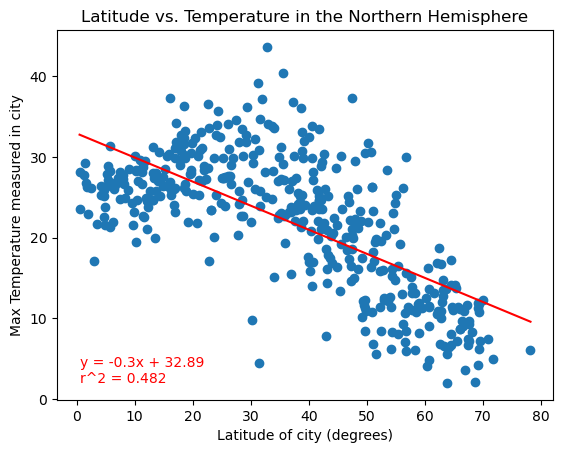

In [84]:
# Linear regression on Northern Hemisphere
plt.scatter(
    x=northern_hemi_df['Lat'],
    y=[T - 273 for T in northern_hemi_df['Max Temp']] 
)
plt.title('Latitude vs. Temperature in the Northern Hemisphere')
plt.xlabel('Latitude of city (degrees)')
plt.ylabel('Max Temperature measured in city')

LinRegPlot(northern_hemi_df['Lat'],[T - 273 for T in northern_hemi_df['Max Temp']],2)

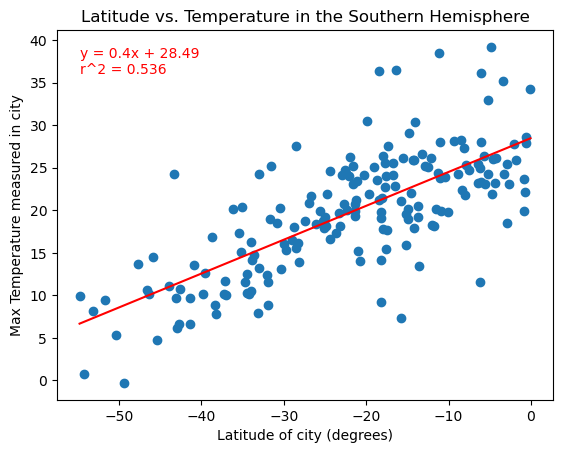

In [86]:
# Linear regression on Southern Hemisphere
plt.scatter(
    x=southern_hemi_df['Lat'],
    y=[T - 273 for T in southern_hemi_df['Max Temp']] 
)
plt.title('Latitude vs. Temperature in the Southern Hemisphere')
plt.xlabel('Latitude of city (degrees)')
plt.ylabel('Max Temperature measured in city')

LinRegPlot(southern_hemi_df['Lat'],[T - 273 for T in southern_hemi_df['Max Temp']], 36)

**Discussion about the linear relationship:** The data clearly demonstrate that temperatures show a negative correlation with distance from the equator. Ideally, one would plot both hemispheres together and fit a curve to the data. This would more clearly display that the 'peak' of the temperature distribution is slightly offset. This is because it is currently summer in the Northern Hemisphere. The peak appears to be more offset than one would expect at this time of year, since we are only weeks from the autumnal equinox. This could be due to the distribution of cities. If cities were denser in the northern latitudes, it would be less likely for two randomly chosen pairs of coordinates to indicate the same nearest city in the citipi library. The result of this would be that our dataset included more points at more populationally dense latitudes.

The time of year also explains the stronger correlation for the data from the Southern Hemisphere. Because the actual 'peak' of global temperatures is north of the equator, the curve is more apparent in the northern hemisphere dataset. Because the curve is more apparent, the line approximates the shape of the data more poorly.

### Humidity vs. Latitude Linear Regression Plot

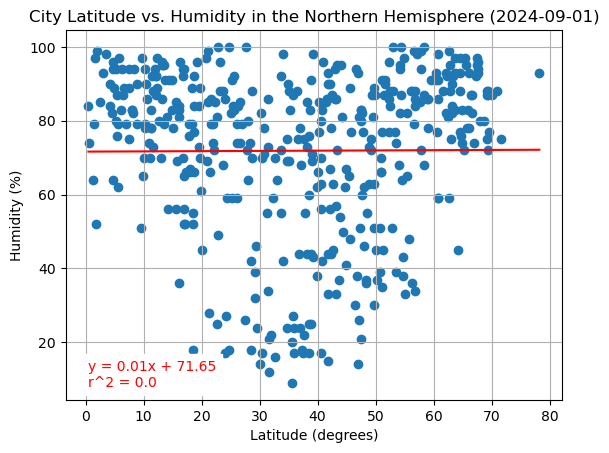

In [90]:
# Northern Hemisphere
plt.scatter(
    x=northern_hemi_df['Lat'],
    y=northern_hemi_df['Humidity']
)

plt.title('City Latitude vs. Humidity in the Northern Hemisphere (2024-09-01)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude (degrees)')
plt.grid(True)

LinRegPlot(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],8)

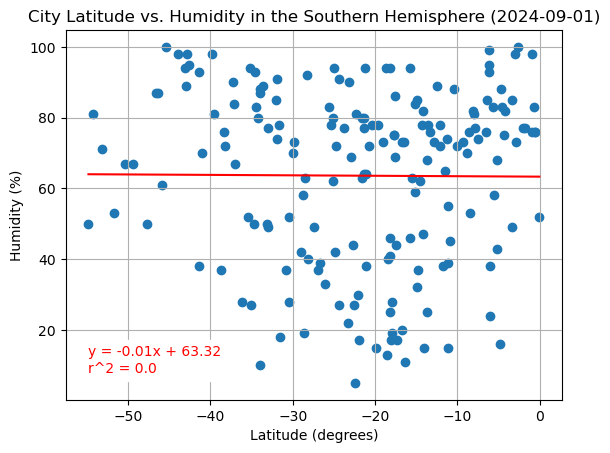

In [91]:
# Southern Hemisphere
plt.scatter(
    x=southern_hemi_df['Lat'],
    y=southern_hemi_df['Humidity']
)

plt.title('City Latitude vs. Humidity in the Southern Hemisphere (2024-09-01)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude (degrees)')
plt.grid(True)

LinRegPlot(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],8)

**Discussion about the linear relationship:** There is no correlation between humidity and latitude. The function rounds r squared to three decimal places, which rounds to zero for both graphs. This is surprising, because the author would have expected some causal relationship between humidity and temperature, which would cause a correlation between latitude and humidity (since latitude and temperature are correlated). This is not the case.

There does, however, appear to be a gap in the data around the hottest temperatures and driest humidities. Does this persist year-round? Would it still show up in a larger dataset? Do jungles get hotter than deserts?

### Cloudiness vs. Latitude Linear Regression Plot

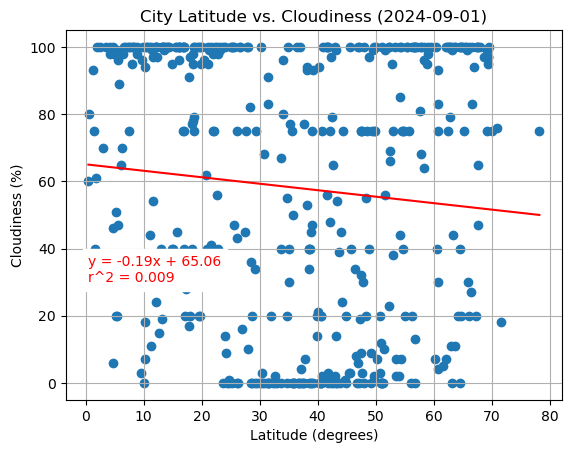

In [93]:
# Northern Hemisphere
plt.scatter(
    x=northern_hemi_df['Lat'],
    y=northern_hemi_df['Cloudiness']
)
# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness (2024-09-01)')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

LinRegPlot(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'],30)

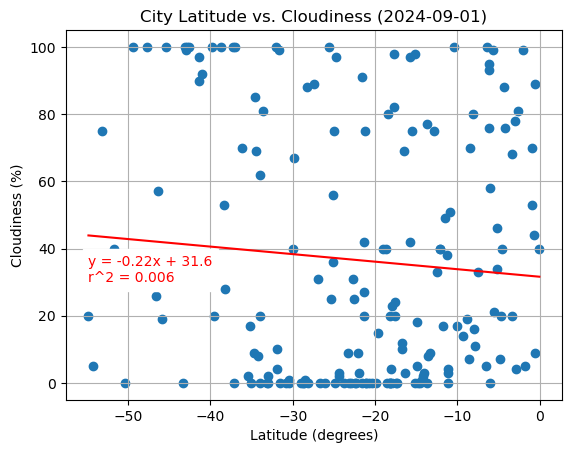

In [94]:
# Southern Hemisphere
plt.scatter(
    x=southern_hemi_df['Lat'],
    y=southern_hemi_df['Cloudiness']
)
# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness (2024-09-01)')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

LinRegPlot(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],30)

**Discussion about the linear relationship:** There is no correlation between latitude and cloudiness. This is surprising, since the author expected that the more direct sunlight hitting the earth near the equator would serve to break up clouds. This turns out not to be true, at least based on today's weather.

### Wind Speed vs. Latitude Linear Regression Plot

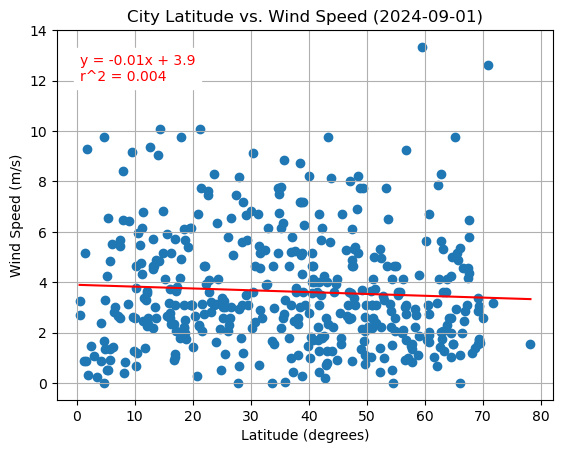

In [95]:
# Northern Hemisphere
plt.scatter(
    x=northern_hemi_df['Lat'],
    y=northern_hemi_df['Wind Speed']
)
# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed (2024-09-01)')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

LinRegPlot(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'],12)

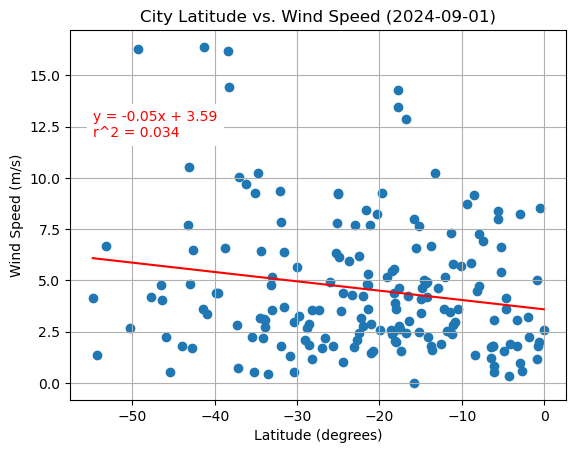

In [96]:
# Southern Hemisphere
plt.scatter(
    x=southern_hemi_df['Lat'],
    y=southern_hemi_df['Wind Speed']
)
# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed (2024-09-01)')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

LinRegPlot(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],12)

**Discussion about the linear relationship:** There is no correlation between latitude and wind speed. High or low winds are as likely at one latitude as another.

One problem that should be noted for all these regressions is the bias toward coastal cities. Randomly generated latitudes and longitudes are more likely to generate points over ocean than over land. The nearest city to a random point over water will almost always be a coastal city. Therefore, a coastal city is more likely to be represented in this dataset than an inland city.